Import some Libraries

In [1]:
import pandas as pd # data maniplutaion
import numpy as np # numerical calculations
import matplotlib.pyplot as plt # plotting
import seaborn as sns #plotting

Load Dataset

In [2]:
df = pd.read_csv('../data/processed_data/final_data.csv', index_col = 0)
df.head()

,TEU,Origin_Country,HS_Codes,alpha-3,cc,ge,pv,rl,rq,va,seadistance,hs_code,mfn_ad_val_rate
1,1.000000,italy,330590,ITA,0.550129,0.611037,0.583321,0.390359,0.644032,1.115531,9971.22,330590.0,0.000
2,2.000000,belgium,730890,BEL,1.336844,1.037022,0.403853,1.295375,1.168225,1.325729,8106.73,730890.0,0.000
3,0.035356,germany,580620,DEU,1.664166,1.185417,0.586989,1.551208,1.456975,1.461386,8323.27,580620.0,0.070
4,4.000000,denmark,392030,DNK,2.376053,2.015649,0.850848,1.908936,1.839520,1.664699,8663.39,392030.0,0.058
5,4.000000,denmark,392030,DNK,2.376053,2.015649,0.850848,1.908936,1.839520,1.664699,8663.39,392030.0,0.058


# Data Preparation

Feature Extraction

In [3]:
# Rename Columns
df.columns = ['TEU','x','hs_code','origin_country','control_corruption','govt_effectiveness','pol_stability_absence_violence','rule_law','reg_qual','voice_accountability','seadistance','y','tariff_rate']

# drop redundant columns
df.drop(columns=['x','y'], inplace=True)

# Get HS_chapter
df['hs_chapter'] = df['hs_code']//10000

# Get HS_chapter+heading
df['hs_heading'] = df['hs_code']//100

df.head()

,TEU,hs_code,origin_country,control_corruption,govt_effectiveness,pol_stability_absence_violence,rule_law,reg_qual,voice_accountability,seadistance,tariff_rate,hs_chapter,hs_heading
1,1.000000,330590,ITA,0.550129,0.611037,0.583321,0.390359,0.644032,1.115531,9971.22,0.000,33,3305
2,2.000000,730890,BEL,1.336844,1.037022,0.403853,1.295375,1.168225,1.325729,8106.73,0.000,73,7308
3,0.035356,580620,DEU,1.664166,1.185417,0.586989,1.551208,1.456975,1.461386,8323.27,0.070,58,5806
4,4.000000,392030,DNK,2.376053,2.015649,0.850848,1.908936,1.839520,1.664699,8663.39,0.058,39,3920
5,4.000000,392030,DNK,2.376053,2.015649,0.850848,1.908936,1.839520,1.664699,8663.39,0.058,39,3920


Feature Engineering

In [4]:
df['hs_code'] = df['hs_code'].astype('object')
df['hs_chapter'] = df['hs_chapter'].astype('object')
df['hs_heading'] = df['hs_heading'].astype('object')

df.dtypes

TEU                               float64
hs_code                            object
origin_country                     object
control_corruption                float64
govt_effectiveness                float64
pol_stability_absence_violence    float64
rule_law                          float64
reg_qual                          float64
voice_accountability              float64
seadistance                       float64
tariff_rate                       float64
hs_chapter                         object
hs_heading                         object
dtype: object

Remove Outliers

In [5]:
# drop few instances in hs_chapters
df['hs_chapter'].value_counts(ascending=True).head(10)

hs_chapter
97      7
1      30
50     41
43    116
88    127
80    340
99    343
51    613
89    690
5     749
Name: count, dtype: int64

In [6]:
df_clean = df[~df['hs_chapter'].isin([97,1,50])]

## EDA

<Axes: ylabel='origin_country'>

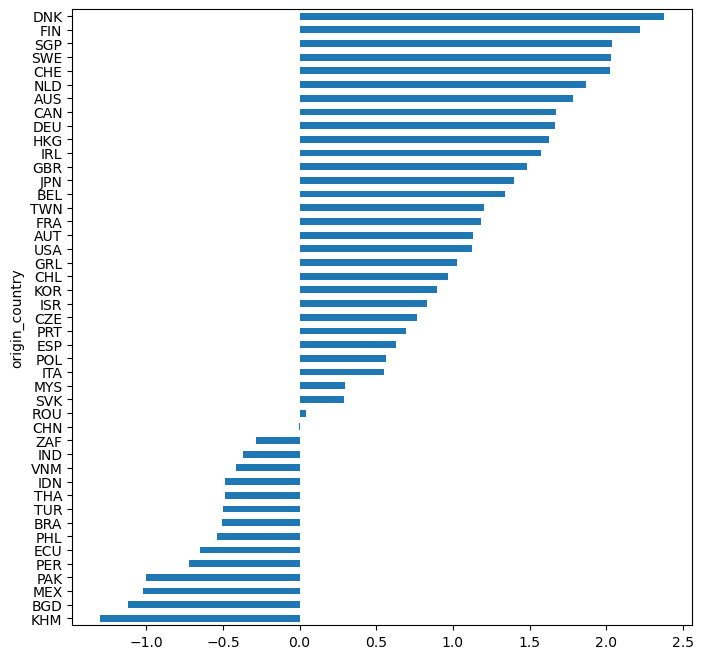

In [20]:
df_clean.groupby('origin_country')['control_corruption'].mean().sort_values().plot.barh(figsize=(8,8))

<Axes: ylabel='origin_country'>

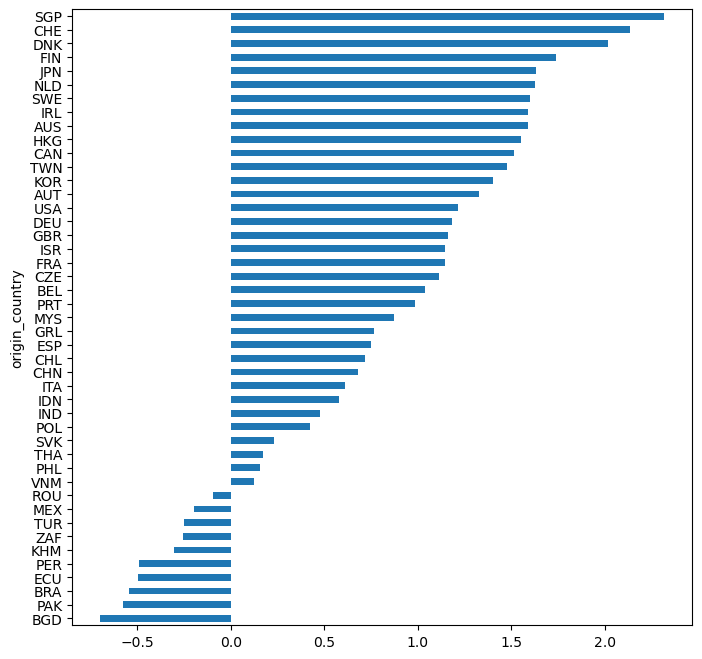

In [21]:
df_clean.groupby('origin_country')['govt_effectiveness'].mean().sort_values().plot.barh(figsize=(8,8))

<Axes: ylabel='origin_country'>

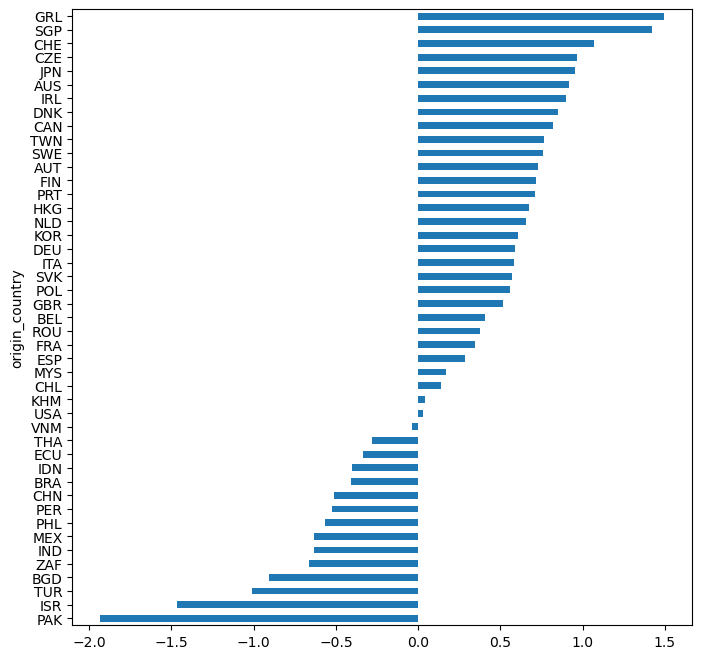

In [22]:
df_clean.groupby('origin_country')['pol_stability_absence_violence'].mean().sort_values().plot.barh(figsize=(8,8))

<Axes: ylabel='origin_country'>

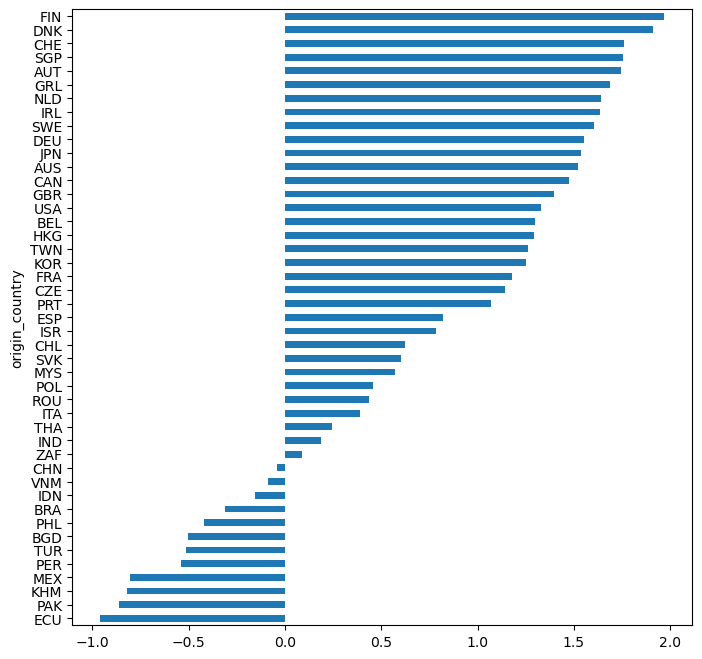

In [23]:
df_clean.groupby('origin_country')['rule_law'].mean().sort_values().plot.barh(figsize=(8,8))

<Axes: ylabel='origin_country'>

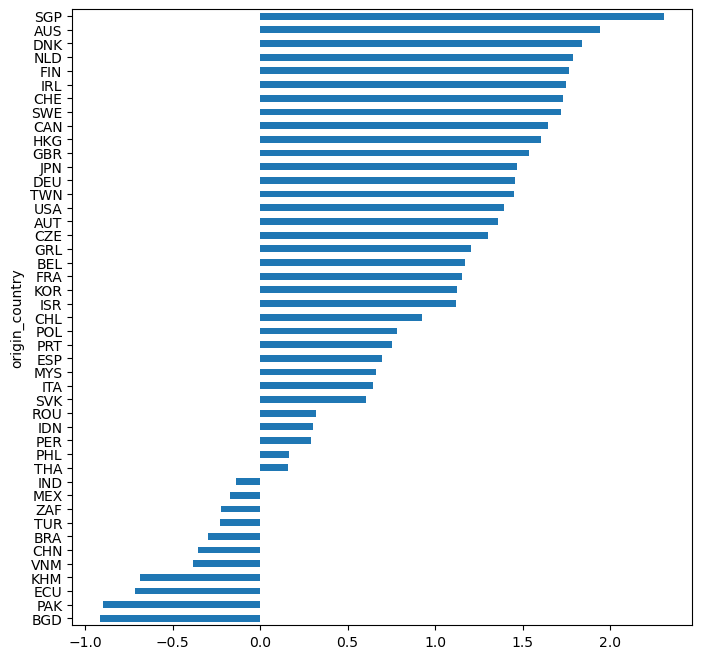

In [24]:
df_clean.groupby('origin_country')['reg_qual'].mean().sort_values().plot.barh(figsize=(8,8))

<Axes: ylabel='origin_country'>

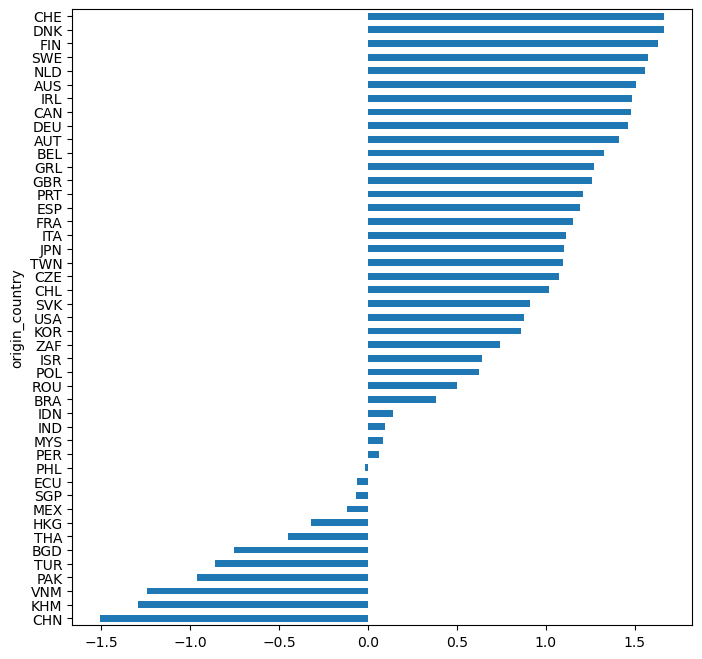

In [26]:
df_clean.groupby('origin_country')['voice_accountability'].mean().sort_values().plot.barh(figsize=(8,8))

<Axes: ylabel='origin_country'>

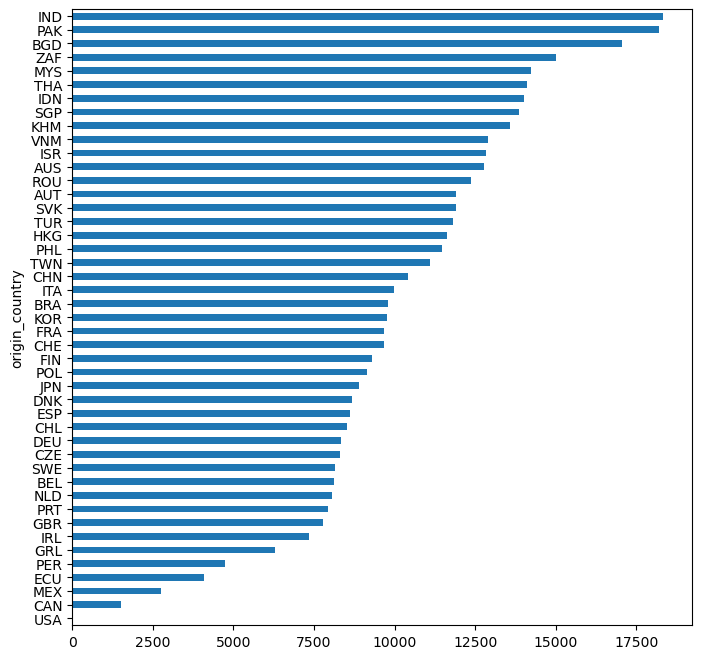

In [27]:
df_clean.groupby('origin_country')['seadistance'].mean().sort_values().plot.barh(figsize=(8,8))

<Axes: >

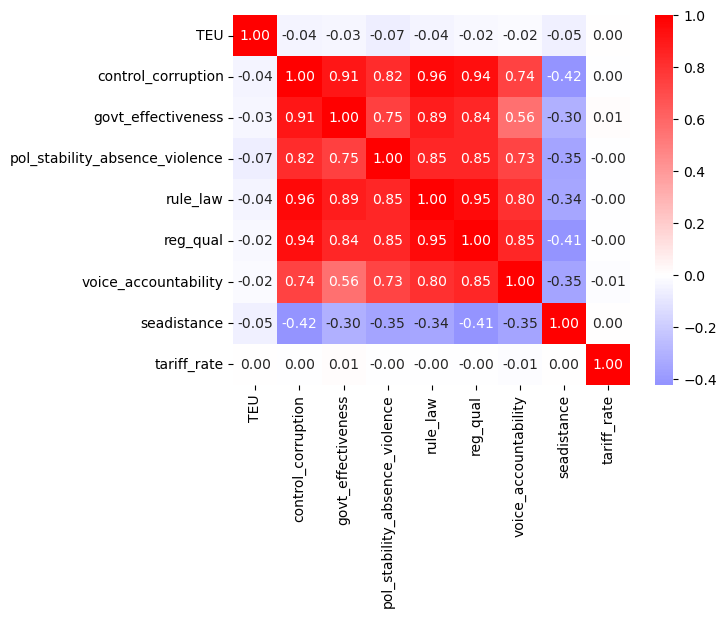

In [32]:
sns.heatmap(df.select_dtypes(exclude='O').corr(), annot=True, cmap='bwr',center=0, fmt='.2f')

## Data Prep

In [34]:
df_clean.dtypes

TEU                               float64
hs_code                            object
origin_country                     object
control_corruption                float64
govt_effectiveness                float64
pol_stability_absence_violence    float64
rule_law                          float64
reg_qual                          float64
voice_accountability              float64
seadistance                       float64
tariff_rate                       float64
hs_chapter                         object
hs_heading                         object
dtype: object

In [41]:
df_clean['shipping_days'] = df_clean['seadistance']/888.96
df_clean.head()

C:\Users\Josh\AppData\Local\Temp\ipykernel_5164\3697051040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['shipping_days'] = df_clean['seadistance']/888.96


,TEU,hs_code,origin_country,control_corruption,govt_effectiveness,pol_stability_absence_violence,rule_law,reg_qual,voice_accountability,seadistance,tariff_rate,hs_chapter,hs_heading,shipping_days
1,1.000000,330590,ITA,0.550129,0.611037,0.583321,0.390359,0.644032,1.115531,9971.22,0.000,33,3305,11.216725
2,2.000000,730890,BEL,1.336844,1.037022,0.403853,1.295375,1.168225,1.325729,8106.73,0.000,73,7308,9.119342
3,0.035356,580620,DEU,1.664166,1.185417,0.586989,1.551208,1.456975,1.461386,8323.27,0.070,58,5806,9.362930
4,4.000000,392030,DNK,2.376053,2.015649,0.850848,1.908936,1.839520,1.664699,8663.39,0.058,39,3920,9.745534
5,4.000000,392030,DNK,2.376053,2.015649,0.850848,1.908936,1.839520,1.664699,8663.39,0.058,39,3920,9.745534


In [ ]:
df_clean.to_csv('../data/clean_data.csv')

In [ ]:
df_clean.shape